## Import library sympy, matplotlib, numpy

In [57]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Client to Server Calculation

## Set symbol for client to server formula

In [58]:
N, F, us, dmin = sp.symbols('N F U_s d_min')

## Display Symbols

In [59]:
display(N)

N

In [60]:
display(F)

F

In [61]:
display(us)

U_s

In [62]:
display(dmin)

d_min

## Display Formula

In [63]:
eq_c2s = N*F/us
eq2_c2s = F/dmin
display(eq_c2s)
display(eq2_c2s)

F*N/U_s

F/d_min

## Create calculation method of eq formula

In [64]:
eq_lmbd_c2s = sp.lambdify((N,F,us),eq_c2s)
eq2_lmbd_c2s = sp.lambdify((F, dmin),eq2_c2s)

## Input argument in calculation method of eq formula

In [65]:
print(eq_lmbd_c2s(5,2,10))

1.0


## Generate N values for client to server calculation 

In [66]:
nilai_N_c2s = np.linspace(1,35,35) 
print(nilai_N_c2s)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.]


## Run the calculation process using all N values in calculation method of eq formula

In [67]:
F_c2s = 2
dmin_c2s = 10
us_c2s = 10

data_n_c2s = []
data_n2_c2s = []
for n in nilai_N_c2s:
    data_n_c2s.append(eq_lmbd_c2s(n,F_c2s,us_c2s))
    data_n2_c2s.append(eq2_lmbd_c2s(F_c2s, dmin_c2s))
hasil_c2s = np.maximum(data_n_c2s, data_n2_c2s)
print(hasil_c2s)

[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6
 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7. ]


## Visualize the graphic of the result of calculation process of Client to Server

Text(0, 0.5, 'Client to Server Result')

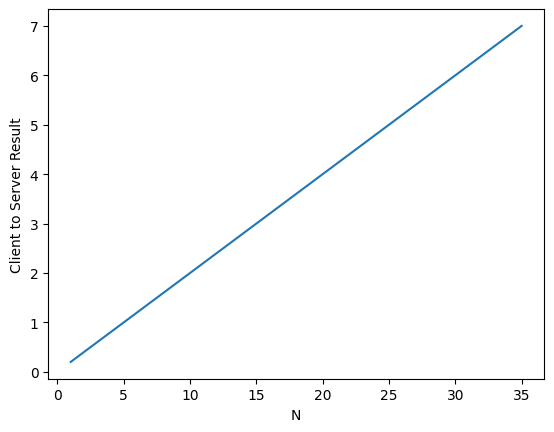

In [68]:
plt.plot(nilai_N_c2s, hasil_c2s)
plt.xlabel('N')
plt.ylabel('Client to Server Result')

# Peer to Peer Calculation

## Set symbol for Client to Server Formula

In [69]:
N, F, us, dmin, sigma_ui = sp.symbols('N F U_s d_min \Sigma{u_i}')

## Display symbols

In [70]:
display(N)

N

In [71]:
display(F)

F

In [72]:
display(us)

U_s

In [73]:
display(dmin)

d_min

In [74]:
display(sigma_ui)

\Sigma{u_i}

In [75]:
eq_p2p = F/us
eq2_p2p = F/dmin
eq3_p2p = (N*F)/(us+sigma_ui)
display(eq_p2p)
display(eq2_p2p)
display(eq3_p2p)

F/U_s

F/d_min

F*N/(U_s + \Sigma{u_i})

## Create Calculation Method for eq, eq2, eq3 formulas

In [76]:
eq_lmbd_p2p = sp.lambdify((F,us),eq_p2p)
eq2_lmbd_p2p = sp.lambdify((F,dmin),eq2_p2p)
eq3_lmbd_p2p = sp.lambdify((N,F,us,sigma_ui),eq3_p2p)

## Display calculation result for eq, eq2, eq3 formulas

In [77]:
F_value = 15 * 1024
us_value = 30

print(eq_lmbd_p2p(F_value, us_value))

512.0


In [78]:
F_value = 15 * 1024
dmin_value = 2

print(eq2_lmbd_p2p(F_value, dmin_value))

7680.0


In [79]:
N_value = 10
F_value = 15 * 1024
us_value = 30
sigma_ui_value = 2

print(eq3_lmbd_p2p(N_value,F_value,us_value,sigma_ui_value))

4800.0


## Generate N values for Peer to Peer calculation 

In [80]:
N_values_p2p = np.linspace(1,35,35)
print(N_values_p2p)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.]


## Run the calculation process using all N values in calculation method of eq formula

In [81]:
F_p2p = 2
dmin_p2p = 10
us_p2p = 10

data_n_p2p = []
data_n2_p2p = []
data_n3_p2p = []

for n in N_values_p2p:
    sigma_p2p = n
    data_n_p2p.append(eq_lmbd_p2p(F_p2p, us_p2p))
    data_n2_p2p.append(eq2_lmbd_p2p(F_p2p, dmin_p2p))
    data_n3_p2p.append(eq3_lmbd_p2p(n, F_p2p ,us_p2p , sigma_p2p))
max_n_n2 = np.maximum(data_n_p2p, data_n2_p2p)
hasil_p2p = np.maximum(max_n_n2, data_n3_p2p)
print(hasil_p2p)
    

[0.2        0.33333333 0.46153846 0.57142857 0.66666667 0.75
 0.82352941 0.88888889 0.94736842 1.         1.04761905 1.09090909
 1.13043478 1.16666667 1.2        1.23076923 1.25925926 1.28571429
 1.31034483 1.33333333 1.35483871 1.375      1.39393939 1.41176471
 1.42857143 1.44444444 1.45945946 1.47368421 1.48717949 1.5
 1.51219512 1.52380952 1.53488372 1.54545455 1.55555556]


## Visualize the graphic of the result of calculation process of Peer to Peer

Text(0, 0.5, 'Peer to Peer')

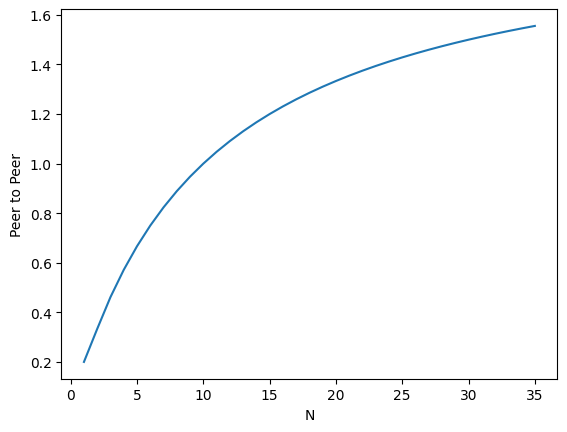

In [82]:
plt.plot(N_values_p2p, hasil_p2p)
plt.xlabel('N')
plt.ylabel('Peer to Peer')

## Visualize the graphic of the result of calculation process of Client to Server and Peer to Peer

Text(0, 0.5, 'D')

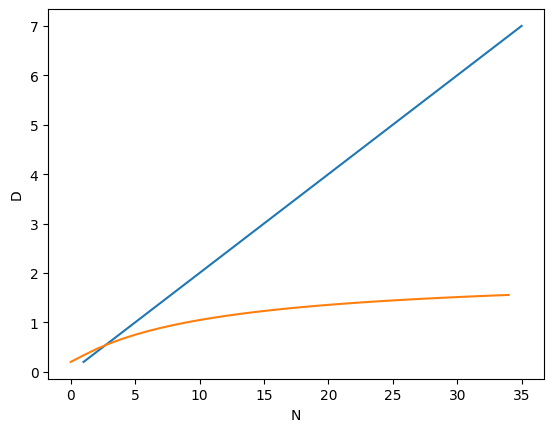

In [83]:
plt.plot(N_values_p2p, hasil_c2s, hasil_p2p)
plt.xlabel('N')
plt.ylabel('D')